In [1]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, BasicAer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
import qiskit as qk
from qiskit.providers.ibmq import least_busy
# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

In [2]:
# Defining the Oracle
def dj_oracle(case , n):
    oracle = qk.QuantumCircuit(n+1)
    if case == "balanced":
        for qubit in range(n):
            oracle.cx(qubit , n)
    
    if case == "constant":
        output = np.random.randint(2)
        if output == 1:
            oracle.x(n)
    
    oracle_gate = oracle.to_gate()
    oracle_gate.name = "ORACLE"
    return oracle_gate

In [3]:
# Defining the actual Deutsch-Jozsa Algorithm 
def dj_algorithm(n , case = 'random'):
    dj_circuit = qk.QuantumCircuit(n+1 , n)
    for qubit in range (n):
        dj_circuit.h(qubit)
        
    dj_circuit.x(n)
    dj_circuit.h(n)
    
    if case == "random":
        random = np.random.randint(2)
        if random == 0:
            case = 'constant'
        else:
            case = 'balanced'
            
        oraclec = dj_oracle(case , n)
        dj_circuit.append(oraclec , range(n+1))
        
        for i in range (n):
            dj_circuit.h(i)
            dj_circuit.measure(i , i)
            
        return dj_circuit

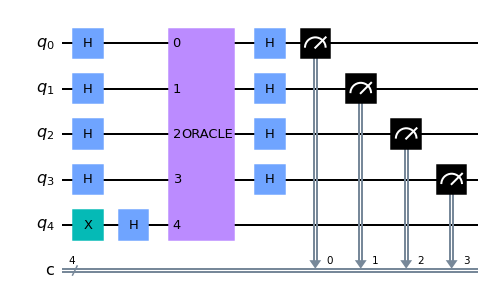

In [4]:
# Calculating with 4 qubits: 0 , 1 , 2 , 3
n = 4
dj_circuit = dj_algorithm(n)
dj_circuit.draw()


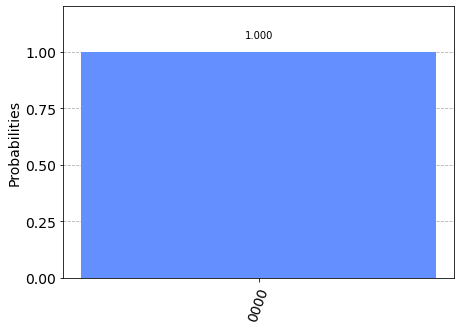

In [5]:
# Running it on Simulator
backend = BasicAer.get_backend('qasm_simulator')
dj_circuit = dj_algorithm(n)
job = qk.execute(dj_circuit , backend = backend , shots = 1024).result()
plot_histogram(job.get_counts())

In [6]:
# Running it on ibmq_lima
backend = provider.get_backend('ibmq_lima')

print("Least Busy Backend: ", backend)
%qiskit_job_watcher
dj_circuit = dj_algorithm(n)
job = qk.execute(dj_circuit , backend = backend , shots = 1024 , optimization_level = 3)
answer = job.result().get_counts()

Least Busy Backend:  ibmq_lima


Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

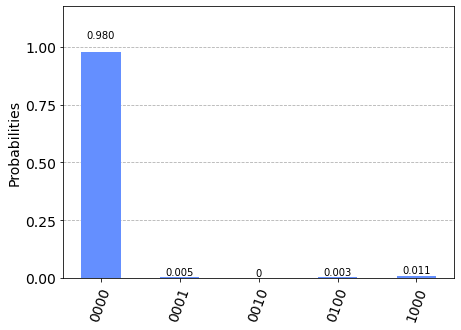

In [7]:
plot_histogram(answer)

In [8]:
# Running it on the least busy Quantum Computer
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 4 and 
                                        not x.configuration().simulator and x.status().operational==True))
print(backend)

%qiskit_job_watcher
dj_circuit = dj_algorithm(n)
job = qk.execute(dj_circuit , backend = backend , shots = 1024 , optimization_level = 3)
answer = job.result().get_counts()

ibmq_quito


Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

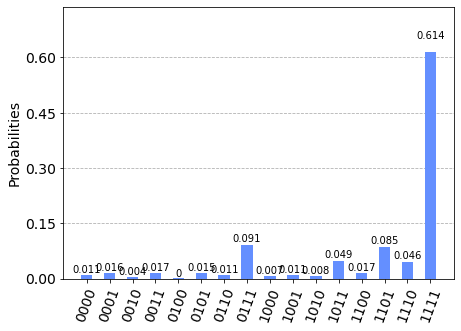

In [9]:
plot_histogram(answer)